<br><br>

## SVM (Support Vector Machine)
- 새로운 데이터가 입력되었을 때 기존 데이터를 활용하여 분류하는 방법
- 패턴 인식, 자료 분석 등을 위한 지도학습 모델로, 주로 회귀와 <b>분류</b> 문제 해결에 사용됨

<br>

### 작동 원리
- SVM 분류 모델은 데이터 공간에 존재하는 경계로 표현되며, 데이터를 분류하는 여러 경계 중에서 가장 큰 마진으로 갖는 경계를 찾음
- Support Vector와 Hyperline(초평면)을 이용하여 분류를 수행함
- 선형분류 뿐만 아니라 비선형 분류에도 사용되며, 비선형 분류에 있어서는 입력 자료를 다차원 공간에 매핑할 때 커널트릭을 사용하기도 함

- Decision Hyperline(결정 초평면) : 각 그룹을 구분하는 분류자로 어떤 n차원의 공간에서 한 차원이 낮은 n-1차원을 가짐
- Support Vector : 초평면에 가장 가까이에 붙어있는 최전방 데이터
- Margin(마진) : 서포트 벡터와 초평면 사이의 수직 거리


### 장점

- 범주나 수치 예측 문제에 사용 가능
- 오류 데이터에 대한 영향이 없음
- 과적합되는 경우가 적음
- 신경망에 비해 사용하기 쉬움

<br>

### 단점

- 여러 개의 조합 테스트 필요
- 학습 속도가 느림
- 해석이 어렵고 복잡한 모델

<br>
<b>[참고] 커널트릭</b><br>
데이터를 선형모델을 분류하고자 할 때, 선형으로 완전히 분류할 수 없는 데이터의 차원을 올려주어 선으로 분류할 수 있게 하는 방법

<b>분류의 경우</b>
> sklearn.svm.SVC(...)

<b>회귀의 경우</b>
> sklearn.svm.SVR(...)

<br>
- kernel : 알고리즘에서 사용할 커널 유형 (선형, 폴리곤, 방사형, 시그모이드)<br>
&emsp;&emsp;&emsp;&emsp;({‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’}, default=’rbf’)<br>
- degree : kernel이 ploy일 때 그 차수 (int, default=3)<br>
- gamma : 결정 경계의 곡률로 kernel이 'rbf', 'poly', 'sigmoid'일 때 튜닝 ({‘scale’, ‘auto’} or float, default=’scale’)<br>
* gamma 값이 클수록 모델은 복잡해지고, 작을수록 모델은 단순화 됨 
 scale의 경우 gamma = 1 / (n_features * X.var())<br>
- C : 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도 (float, default=1.0)<br>
* C값이 클수록 모델은 복잡해지고, 작을수록 모델은 단순화 됨 

<b>[예제]</b><br>credit 데이터의 train 데이터로 credit.rating(기간 내 대출 상환 여부)을분류하는 SVM 모델 만들어라

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

credit = pd.read_csv("C:/adp/data/credit_final.csv")
X = credit.drop(['credit.rating'],axis=1)
y = credit['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
X_train.head()

,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,guarantor,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
133,3,18,2,3,1453,1,1,3,1,1,1,1,26,2,2,1,3,1,1,1
464,2,12,2,4,7472,4,1,1,1,1,2,1,24,2,1,1,1,1,1,1
919,1,48,3,1,6331,1,4,4,3,1,4,4,46,2,3,2,3,1,2,1
865,3,15,3,3,1271,4,2,3,3,1,4,4,39,2,3,2,3,1,2,1
352,3,48,3,4,7629,4,4,4,1,1,2,3,46,1,2,2,4,2,1,1


In [2]:
from sklearn.svm import SVC

svc = SVC()

svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [3]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [4]:
svc.score(X_train,y_train)

0.7242857142857143

In [5]:
svc.score(X_test,y_test)

0.6766666666666666

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix

print(f"정확도 : {accuracy_score(y_test, y_pred)}")
print(f"정밀도 : {precision_score(y_test, y_pred)}")
print(f"재현율 : {recall_score(y_test, y_pred)}")
print(f"F1 스코어 : {f1_score(y_test, y_pred)}")

pd.DataFrame(confusion_matrix(y_test, y_pred),
             index=['True[0]', 'True[1]'],
             columns=['Pred[0]','Pred[1]'])

정확도 : 0.6766666666666666
정밀도 : 0.6815068493150684
재현율 : 0.9802955665024631
F1 스코어 : 0.804040404040404


,Pred[0],Pred[1]
True[0],4,93
True[1],4,199


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


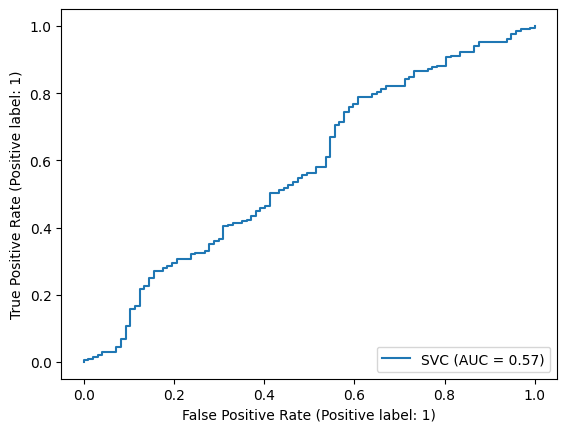

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(svc, X_test, y_test)
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

parameters = {'gamma':[0.1, 1, 10] ,'C': [0.01, 0.1 ,0.5, 1, 10,20,30]}

grid_svm = GridSearchCV(SVC(), param_grid = parameters, cv = 5)
grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
0,0.01,0.1,0.710000
9,1.00,0.1,0.710000
19,30.00,1.0,0.710000
17,20.00,10.0,0.710000
16,20.00,1.0,0.710000
14,10.00,10.0,0.710000
13,10.00,1.0,0.710000
11,1.00,10.0,0.710000
1,0.01,1.0,0.710000
10,1.00,1.0,0.710000


In [9]:
print("Best Parameters:\n", grid_svm.best_params_)
print("Best Estimators:\n", grid_svm.best_estimator_)

Best Parameters:
 {'C': 0.01, 'gamma': 0.1}
Best Estimators:
 SVC(C=0.01, gamma=0.1)


C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


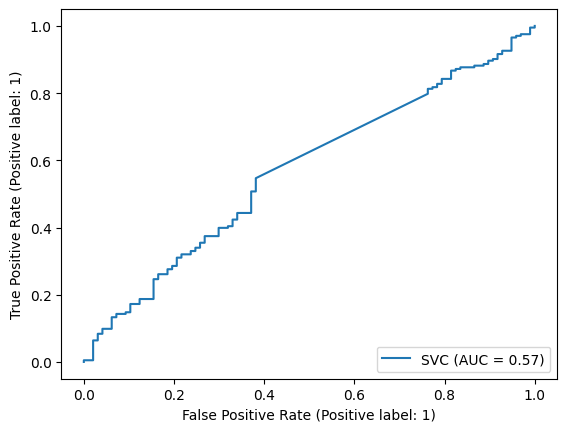

In [10]:
plot_roc_curve(SVC(C=0.01, gamma=0.1).fit(X_train, y_train), X_test, y_test)
plt.show()

In [19]:
# 변수 표준화 필요
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [20]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)

In [21]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

parameters = {'gamma':[0.01, 0.1, 1, 10] ,'C': [0.01, 0.1 ,0.5, 1, 10,20,30]}

grid_svm = GridSearchCV(SVC(), param_grid = parameters, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,gamma,mean_test_score
21,20.00,0.10,0.758571
24,30.00,0.01,0.755714
25,30.00,0.10,0.754286
20,20.00,0.01,0.754286
17,10.00,0.10,0.754286
13,1.00,0.10,0.747143
14,1.00,1.00,0.745714
16,10.00,0.01,0.745714
18,10.00,1.00,0.724286
9,0.50,0.10,0.722857


In [22]:
svc = SVC(C = 20.00, gamma=0.1, probability=True) # probability 확률로 나타낸다.

In [23]:
svc.fit(X_train_scaled, y_train)

SVC(C=20.0, gamma=0.1, probability=True)

In [24]:
svc.score(X_test_scaled, y_test)

0.7733333333333333

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:,1])

0.7679904524909857

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


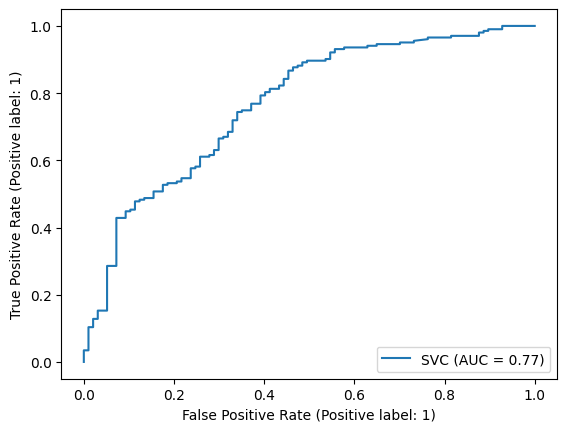

In [26]:
plot_roc_curve(svc, X_test_scaled, y_test)

In [28]:
# 변수 정규화
from sklearn.preprocessing import StandardScaler
zscaler = StandardScaler() 
X_train_scaled = pd.DataFrame(zscaler.fit_transform(X_train),columns=X_train.columns)

In [30]:
X_test_scaled = pd.DataFrame(zscaler.transform(X_test),columns=X_train.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

parameters = {'gamma':[0.01, 0.1, 1, 10] ,'C': [0.01, 0.1 ,0.5, 1, 10,20,30]}

grid_svm = GridSearchCV(SVC(), param_grid = parameters, cv = 5)
grid_svm.fit(X_train_scaled, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

In [32]:
svc = SVC(C = 20.00, gamma=0.1, probability=True) # probability 확률로 나타낸다.

In [33]:
svc.fit(X_train_scaled, y_train)

SVC(C=20.0, gamma=0.1, probability=True)

In [34]:
svc.score(X_test_scaled, y_test)

0.72

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, svc.predict_proba(X_test_scaled)[:,1])

0.7092580366664973

C:\Users\신주현\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


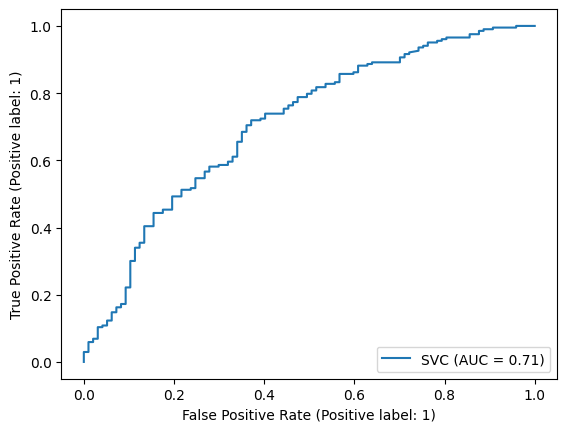

In [36]:
plot_roc_curve(svc, X_test_scaled, y_test)